> # EDA

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [55]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [56]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [57]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Dealing with Null Values

In [60]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n""There are" + str(mz_table.shape[0]) +" columns that have missing values.")
#mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 15 columns and 891 Rows.
There are4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
deck,0,688,77.2,688,77.2,category
age,0,177,19.9,177,19.9,float64
embarked,0,2,0.2,2,0.2,object
embark_town,0,2,0.2,2,0.2,object


In [61]:
df.drop(['deck'],axis=1,inplace=True)
df.dropna(subset=['embarked','embark_town'],inplace=True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

### Fill AGE with MEAN

In [62]:
df['age'].fillna(df['age'].mean(),inplace=True)

### 

In [87]:
a = df['class'].unique()
for col in (a):
    print(col)

Third
First
Second


In [89]:
a = df['class'].value_counts()
for col in (a):
    print(col)

491
214
184


In [93]:
df.duplicated().sum() 
df.drop_duplicates(inplace=True)

## Normality

<AxesSubplot: xlabel='age', ylabel='Count'>

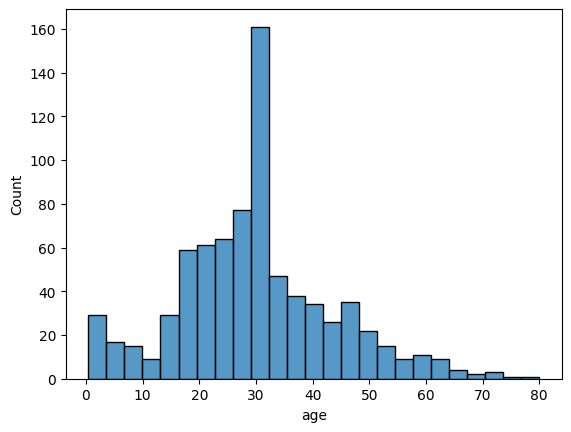

In [96]:
sns.histplot(df['age'])

In [97]:
df['age'].skew()

0.3974010275271775

<AxesSubplot: >

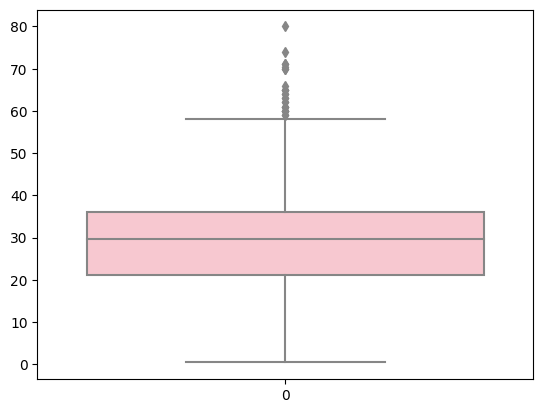

In [103]:
sns.boxplot(df['age'],color='pink')

In [104]:
df.corr()

C:\Users\moiza\AppData\Local\Temp\ipykernel_5340\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.333291,-0.084143,-0.036044,0.071352,0.244700,-0.524665,-0.179048
pclass,-0.333291,1.000000,-0.335280,0.085055,0.037218,-0.551236,0.064933,0.116424
age,-0.084143,-0.335280,1.000000,-0.279112,-0.185714,0.087762,0.281640,0.191293
sibsp,-0.036044,0.085055,-0.279112,1.000000,0.380174,0.135490,-0.276553,-0.608379
parch,0.071352,0.037218,-0.185714,0.380174,1.000000,0.192411,-0.349504,-0.569960
fare,0.244700,-0.551236,0.087762,0.135490,0.192411,1.000000,-0.162682,-0.247704
adult_male,-0.524665,0.064933,0.281640,-0.276553,-0.349504,-0.162682,1.000000,0.391585
alone,-0.179048,0.116424,0.191293,-0.608379,-0.569960,-0.247704,0.391585,1.000000


C:\Users\moiza\AppData\Local\Temp\ipykernel_5340\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

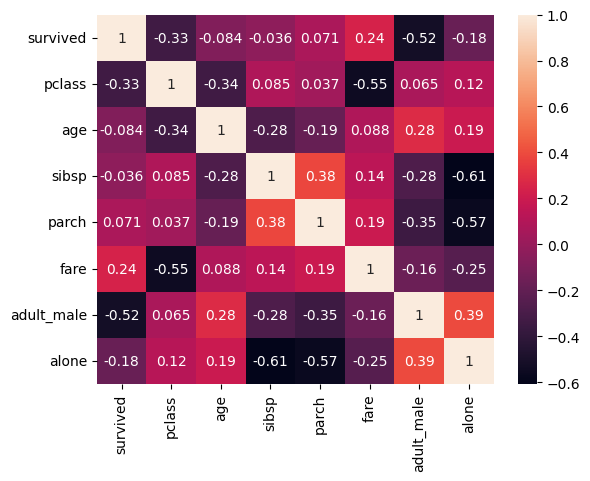

In [107]:
sns.heatmap(df.corr(), annot=True)